In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

<h2> Read Data from CSV

In [154]:
df = pd.read_csv('heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


The dataset contains the following features:
1. age(in years)
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0

In [ ]:
df.dtypes

In [ ]:
print('# of rows: ', df.shape[0])
print('# of columns: ', df.shape[1])

In [ ]:
df.describe()

**The features described in the above data set are**

1. Count = Number of NoN-empty rows in a feature
2. Mean  = Mean value of that feature
3. Std   = Standard Deviation Value of that feature
4. Min   = Minimum value of that feature
5. 25%, 50%, and 75% = Percentile/quartile of each features.
6. Max   = Maximum value of that feature.

<h1>Data Visualization

<h2>Plot Features

<h3>thalach

In [ ]:
sns.distplot(df['thalach'], color='blue')

In [ ]:
sns.distplot(df['thalach'], kde = False, bins=30, color='blue')

<h3>chol

/home/ishamm/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


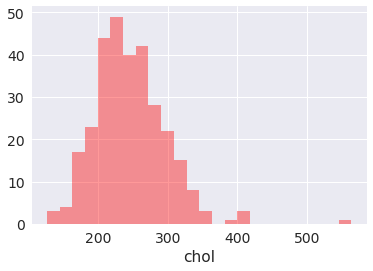

In [156]:
sns.distplot(df['chol'], kde=False,color='red')
plt.show()

<h3>trestbps

/home/ishamm/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


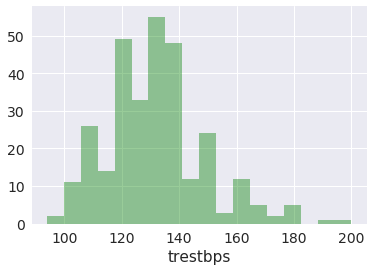

In [157]:
sns.distplot(df['trestbps'], kde=False, color='green')
plt.show()

<h3>age vs target

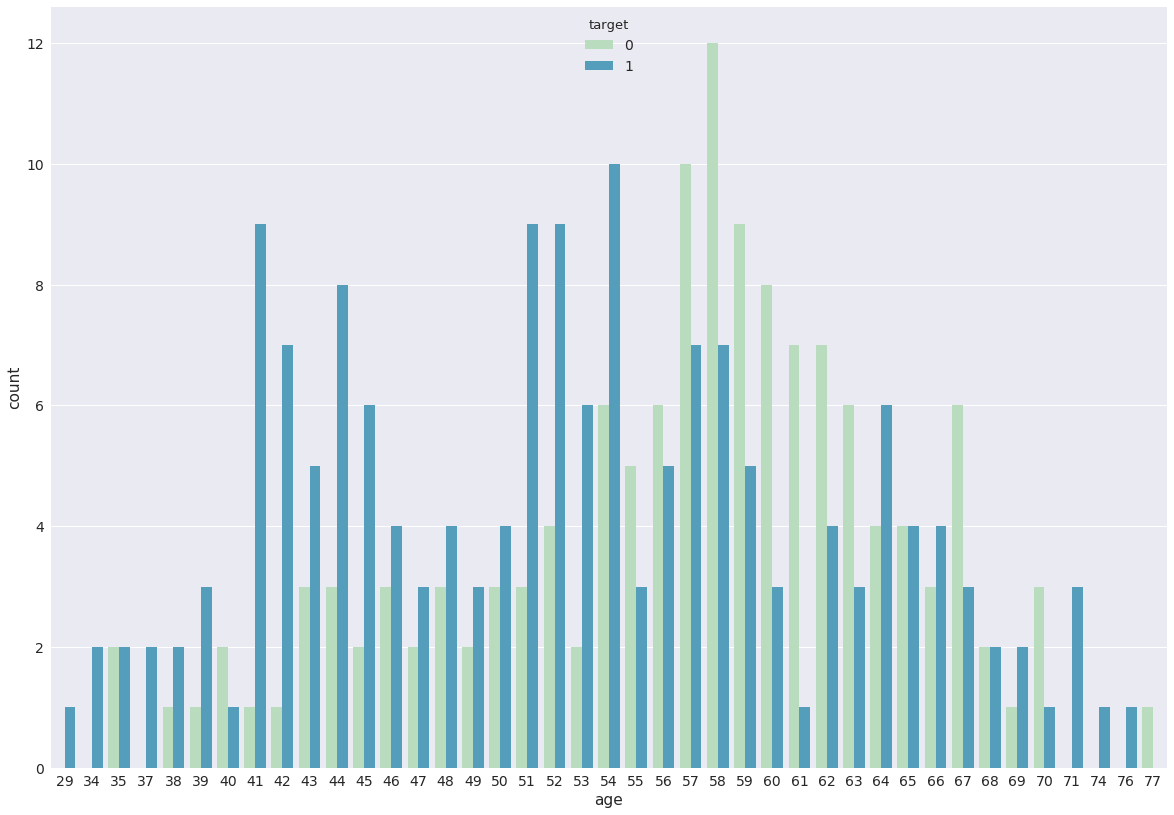

In [158]:
plt.figure(figsize=(20,14))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

<h2>Scatter Plots

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df, hue='target')
plt.show()

<h3>thalach vs. chol

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='target',y='thalach',data=df, hue='sex')
plt.show()

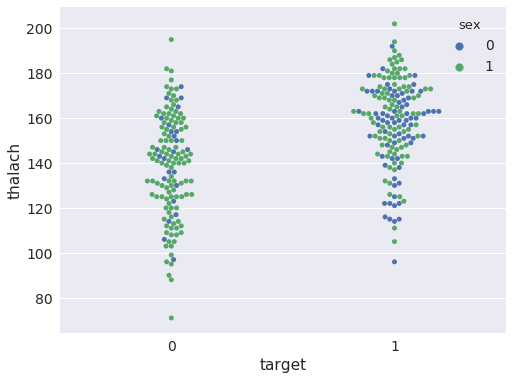

In [155]:
plt.figure(figsize=(8,6))
sns.swarmplot(x='target',y='thalach',data=df, hue='sex')
plt.show()

<h2>Box Plots

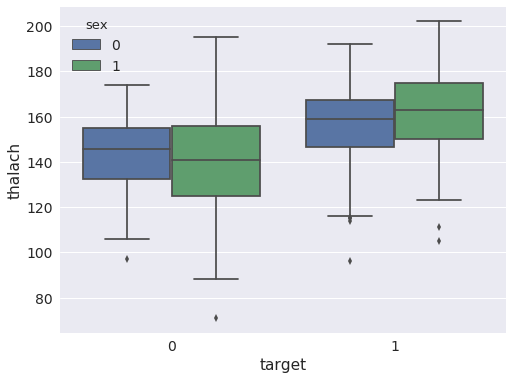

In [161]:
plt.figure(figsize=(8,6))
sns.boxplot(x='target',y='thalach',data=df, hue='sex')
plt.show()

<h2>Violin Plot

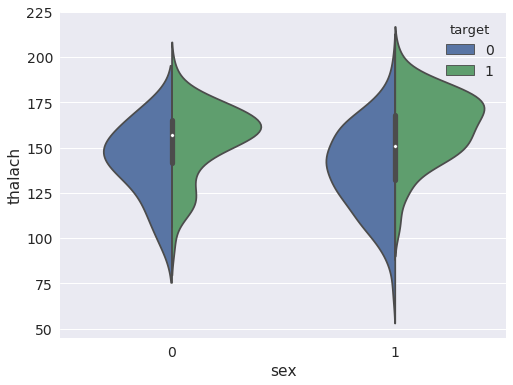

In [163]:
plt.figure(figsize=(8,6))
sns.violinplot(x='sex',y='thalach',data=df, hue='target', split=True)
plt.show()

<h1>Data Cleaning

<h2>NULL Values

<h3>Check NULL Values

In [ ]:
df.isnull().sum()

<h3>Fill NULL Values

In [ ]:
df.fillna(method='ffill')

<h3>Some Other Methods of Filling Null Values</h3>

**df.fillna(0)** - fill with "0" <br>
**df.fillna(method='bfill')** - fill with before value <br>
**df.fillna({'age': 10, 'sex': 1, 'cp': 1, 'trestbps': 130})** - fill with given values


<h3>Drop NULL Value Columns

In [ ]:
df.dropna()

<h2>Outlier Removal

<h3>Using Z-Score Approach

In [115]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df, hue='target')
plt.show()

AttributeError: module 'seaborn' has no attribute 'scatterplot'

<Figure size 576x432 with 0 Axes>

In [116]:
df2 = df[(np.abs(stats.zscore(df['thalach'])) < 3)]
df2 = df2[(np.abs(stats.zscore(df2['trestbps'])) < 3)]

In [117]:
df2.shape[0]

300

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df2, hue='target')
plt.show()

<h3>Using Quantile Approach

In [ ]:
q = df['thalach'].quantile(0.99)
df3 = df[df['thalach'] < q]

q = df3['trestbps'].quantile(0.99)
df3 = df3[df3['trestbps'] < q]

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df3, hue='target')
plt.show()

In [ ]:
df3.shape[0]

In [ ]:
df = df3

<h3>Encoding Categorical Variables

In [ ]:
from sklearn import preprocessing

In [ ]:
df_1 = pd.read_csv('heart-mod.csv')
df_1.head(3)

In [ ]:
df_1.describe()

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df_1['sex'] = label_encoder.fit_transform(df_1['sex'])
df_1.head(3)

<h3>Data Normalization

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)

In [ ]:
df.head(5)

In [ ]:
pd.DataFrame(df_scaled).head(5)

<h2>Feature Engineering

<h3>Correlation Analysis

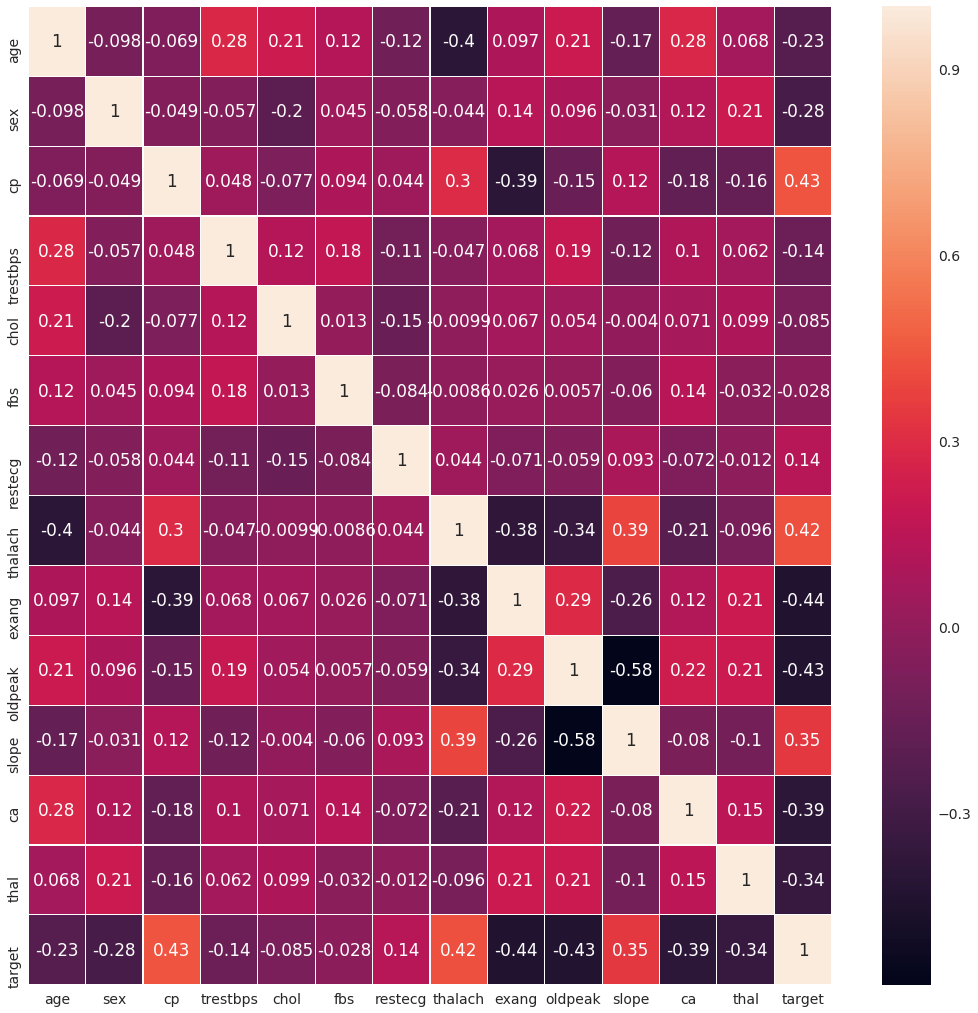

In [118]:
plt.figure(figsize=(18,18))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(df.corr(), annot = True ,linewidths=.1)
plt.show()

In [119]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [120]:
columns_to_drop = find_correlation(df.drop(columns=['target']) , 0.7)
df4 = df.drop(columns=columns_to_drop)

In [121]:
df4

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [122]:
corr = df.corr()
linear_features=abs(corr).target.drop('target').sort_values(ascending=False)[:5].keys()

In [ ]:
corr

In [ ]:
abs(corr)

In [ ]:
abs(corr).target

In [ ]:
abs(corr).target.drop('target')

In [ ]:
abs(corr).target.drop('target').sort_values().plot(kind='barh')

In [ ]:
abs(corr).target.drop('target').sort_values(ascending=False)[:5].plot(kind='barh')

<h3>Using Random Forest Classifier to Identify Important Features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
y = df.copy(deep=True)['target']
model = rf.fit(df.drop('target', axis=1),y)

In [ ]:
importance = rf.feature_importances_
feat_importances_act = pd.Series(importance, index=df.drop('target', axis=1).columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

<h3>Convert Categorical Variables into Dummy Variables

In [ ]:
df.dtypes

In [146]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [140]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [152]:
df_1 = pd.get_dummies(df, drop_first=True)
df_1.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [153]:
df

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_0,sex_1,cp_0,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5,57,140,192,148,0.4,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
6,56,140,294,153,1.3,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
7,44,120,263,173,0.0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
8,52,172,199,162,0.5,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
9,57,150,168,174,1.6,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


<h1>Applying ML Models

<h2>Split Train and Test sets

In [168]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target',1), df['target'], test_size = .2, random_state=10)

In [134]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2


<h2>Random Forest Classifier

In [ ]:
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(max_depth=20)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# cla_pred.append(accuracy_score(y_test,predictions))
print(accuracy_score(y_test,predictions))

In [ ]:
importance = model.feature_importances_
feat_importances_act = pd.Series(importance, index=X_train.columns)
feat_importances = feat_importances_act.nlargest(20)
feat_importances.plot(kind='barh')

<h3> Other Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,predictions))
    print(name,accuracy_score(y_test,predictions))

<h2>Hyper Parameter Tuning

<h3>Using Grid Search

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
log_pred=logmodel.predict(X_test)
print(confusion_matrix(y_test,log_pred))
print(classification_report(y_test,log_pred))
print(accuracy_score(y_test,log_pred))

[[24 11]
 [ 6 20]]
             precision    recall  f1-score   support

          0       0.80      0.69      0.74        35
          1       0.65      0.77      0.70        26

avg / total       0.73      0.72      0.72        61

0.7213114754098361


In [170]:
#Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
h_logmodel = GridSearchCV(logmodel, hyperparameters, cv=5, verbose=0)
best_logmodel=h_logmodel.fit(df.drop('target', 1), df['target'])
print('Best Penalty:', best_logmodel.best_estimator_.get_params()['penalty'])
print('Best C:', best_logmodel.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 21.544346900318832


In [ ]:
df.head()

In [176]:
np.logspace(0, 4)

array([1.00000000e+00, 1.20679264e+00, 1.45634848e+00, 1.75751062e+00,
       2.12095089e+00, 2.55954792e+00, 3.08884360e+00, 3.72759372e+00,
       4.49843267e+00, 5.42867544e+00, 6.55128557e+00, 7.90604321e+00,
       9.54095476e+00, 1.15139540e+01, 1.38949549e+01, 1.67683294e+01,
       2.02358965e+01, 2.44205309e+01, 2.94705170e+01, 3.55648031e+01,
       4.29193426e+01, 5.17947468e+01, 6.25055193e+01, 7.54312006e+01,
       9.10298178e+01, 1.09854114e+02, 1.32571137e+02, 1.59985872e+02,
       1.93069773e+02, 2.32995181e+02, 2.81176870e+02, 3.39322177e+02,
       4.09491506e+02, 4.94171336e+02, 5.96362332e+02, 7.19685673e+02,
       8.68511374e+02, 1.04811313e+03, 1.26485522e+03, 1.52641797e+03,
       1.84206997e+03, 2.22299648e+03, 2.68269580e+03, 3.23745754e+03,
       3.90693994e+03, 4.71486636e+03, 5.68986603e+03, 6.86648845e+03,
       8.28642773e+03, 1.00000000e+04])

In [169]:
logmodel=LogisticRegression(penalty='l2',C=21.544346900318832)
logmodel.fit(X_train,y_train)
h_log_pred=logmodel.predict(X_test)
print(confusion_matrix(y_test,h_log_pred))
print(classification_report(y_test,h_log_pred))
print(accuracy_score(y_test,h_log_pred))

[[26  9]
 [ 5 21]]
             precision    recall  f1-score   support

          0       0.84      0.74      0.79        35
          1       0.70      0.81      0.75        26

avg / total       0.78      0.77      0.77        61

0.7704918032786885


<h2> Model Evaluation

In [177]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,h_log_pred)

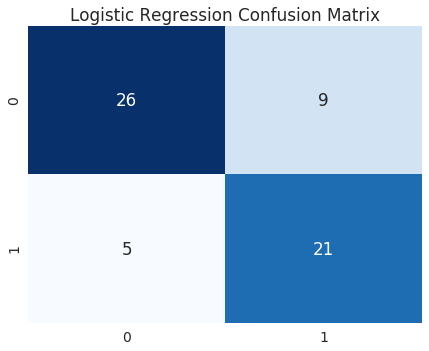

In [181]:
plt.figure(figsize=(24,12))

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)


plt.show()


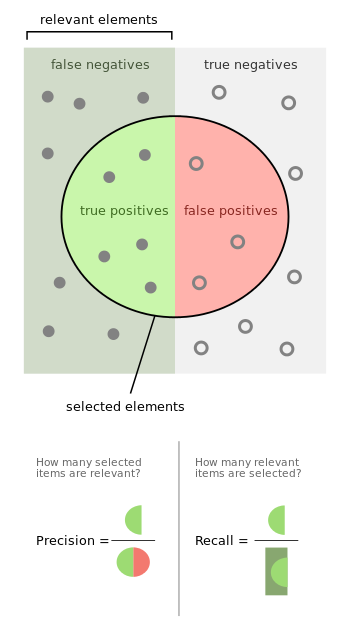

In [185]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1])

In [188]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc_curve(y_test,logmodel.predict_proba(X_test))
plt.show()


ModuleNotFoundError: No module named 'scikitplot'